# Worksheet 14

Name:  Xiang Li
UID:  U53450247

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using [data.csv](https://raw.githubusercontent.com/gallettilance/CS506-Fall2022/master/worksheets/data.csv)?

Please raise your hand in class when you have a prediction.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

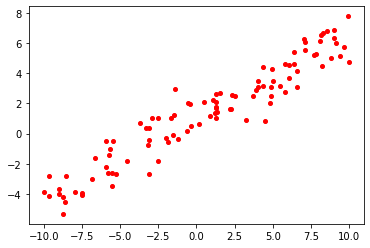

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#crea
line = np.array([1,0.5])

xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

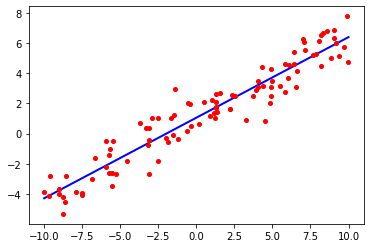

In [7]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylin)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

Data follow the estimation of beta

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

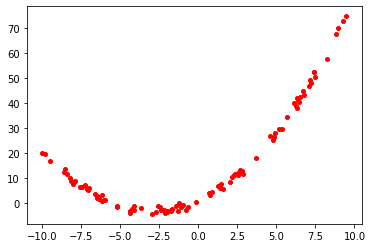

In [13]:

line=np.array([1,3,0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+(line[2]*xlin**2)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()


e) Plot the least squares estimate line through the scatter plot.

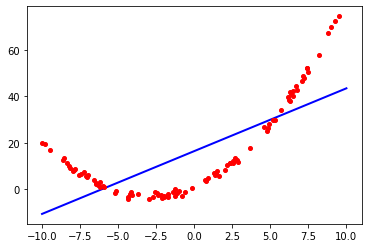

In [14]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylin)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The bete estimation does not follow the generation of data

g) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 4 * log(X) + eps`.

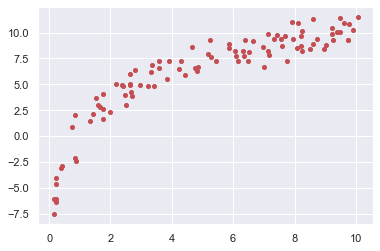

In [19]:

line = np.array([1,4])
xlin = 0.1 + 10.0 * np.random.random(100)
ylin = line[0]+(line[1]*np.log(xlin))+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()



h) Plot the least squares estimate line through the scatter plot.

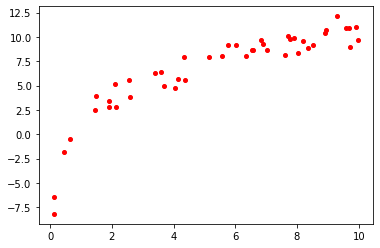

In [16]:

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylin)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()


i) How does the estimate of `beta` compare to the parameters we used to generate the data?

Unable to construct a beta estimation according to the data

j) Using the `statsmodels` library, fill out the code below to generate a surface that cuts through the 3D scatter plot.

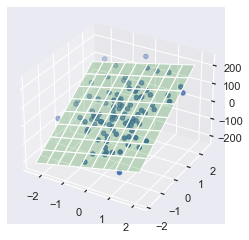

In [18]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import statsmodels.api as sm

import seaborn as sns; sns.set()

X, y = datasets.make_regression(n_samples=100, n_features=2, n_informative=5, noise=30, random_state=1)
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

x1, x2 = np.meshgrid(np.arange(min(X.T[1]), max(X.T[1]), .5), np.arange(min(X.T[2]), max(X.T[2]), .5))
exog = pd.core.frame.DataFrame({'x0': np.ones(len(x1.ravel())).ravel(), 'x1': x1.ravel(), 'x2':x2.ravel()})
out = model.predict(exog)

ax = plt.axes(projection='3d')
ax.scatter3D(X.T[1], X.T[2], y)
ax.plot_surface(x1, x2, out.values.reshape(x1.shape), color='Green', alpha=.2)
plt.show()